<a href="https://colab.research.google.com/github/arifuddinatif/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Copy_of_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

# <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

#Downloading libraries

In [1]:
#for data manipulation
import pandas as pd
import numpy as np
import re
import string

#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#for ML
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Getting Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projects/CP -3 Supervised ML - Classification (corona virus tweet sentiment analysis)/dat files/Coronavirus Tweets.csv",encoding='latin-1')

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
pd.DataFrame(df.isnull().mean()*100,columns=['Null Percentage'])

,Null Percentage
UserName,0.000000
ScreenName,0.000000
Location,20.871298
TweetAt,0.000000
OriginalTweet,0.000000
Sentiment,0.000000


In [ ]:
df['Location'] = df['Location'].fillna(df['Location'].mode())

In [ ]:
df['Location'].isnull().sum()

8590

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


##Cleaning TweetAt Column

In [ ]:
df['TweetAt'].unique() 

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [18]:
# function to change the string format to date

from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column, '%d-%m-%Y')

In [19]:
# applying the above function to 'TweetAt' column

df['TweetAt'] = df['TweetAt'].apply(change_to_timestamp)

In [ ]:
type(df['TweetAt'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# getting the month number from 'TweetAt' column

df['TweetMonth'] = df['TweetAt'].apply(lambda x : x.month)

#EDA

##Check and clean Null Values

In [6]:
count = df.isnull().sum().sort_values(ascending = False)

In [7]:
percentage = ((df.isnull().sum())/len(df)*100).sort_values(ascending=False)

In [8]:
missing_data = pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])

In [9]:
missing_data

,Count,Percentage
Location,8590,20.871298
Sentiment,0,0.000000
OriginalTweet,0,0.000000
TweetAt,0,0.000000
ScreenName,0,0.000000
UserName,0,0.000000


In [3]:
df["Location"].fillna(df['Location'].mode().iloc[0],inplace=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Tweets distributions')

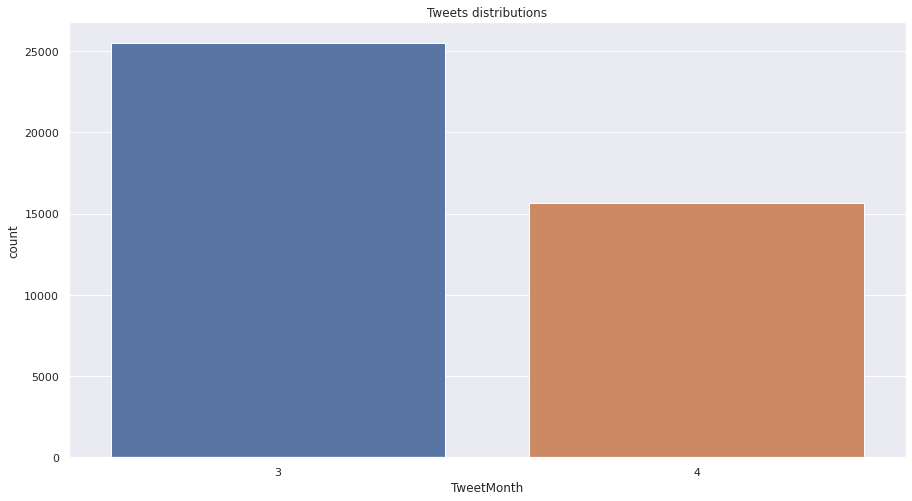

In [ ]:
# getting count of months 3 and 4 

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['TweetMonth'])
plt.title('Tweets distributions')

More tweets were made in month of March

In [ ]:
df['TweetAt'].unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-06T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-12

In [ ]:
# getting differant dates from the unique months

list_of_month_3 = []
list_of_month_4 = []
for i in range(len(df['TweetAt'])):
  if df['TweetAt'][i].month == 3:
    list_of_month_3.append(df['TweetAt'][i].day)
  if df['TweetAt'][i].month == 4:
    list_of_month_4.append(df['TweetAt'][i].day) 

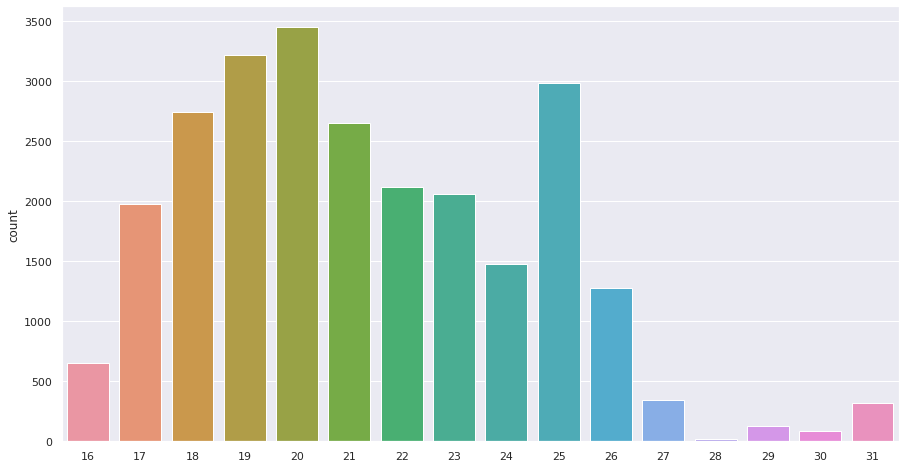

In [ ]:
# plotting the frequency of the tweets from month 3 (march)

sns.countplot(x=list_of_month_3)

Users were most active between 18/03 to 26/03

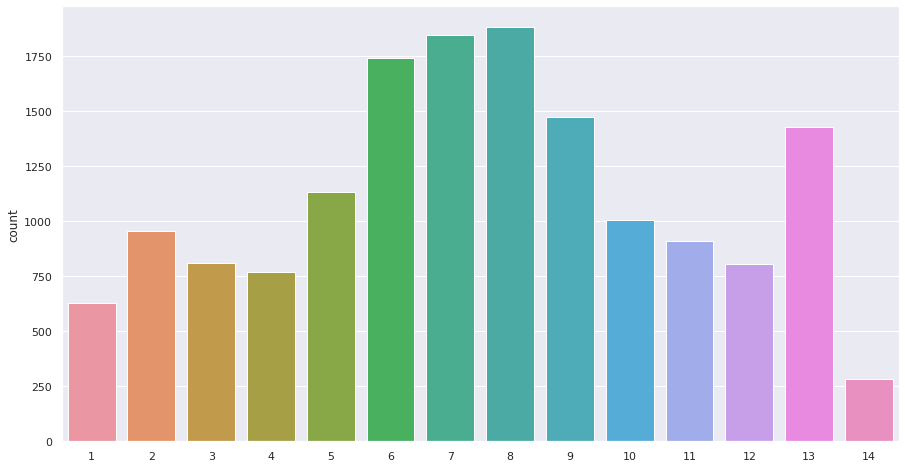

In [ ]:
# plotting the frequency of the tweets from month 4 (april)

sns.countplot(x=list_of_month_4)

Text(0.5, 1.0, 'Sentiment distributions')

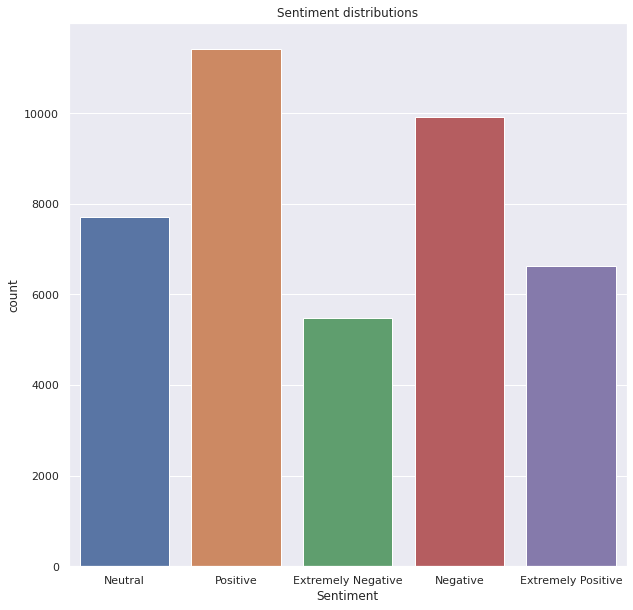

In [ ]:
#

plt.figure(figsize=(10,10))
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment distributions')

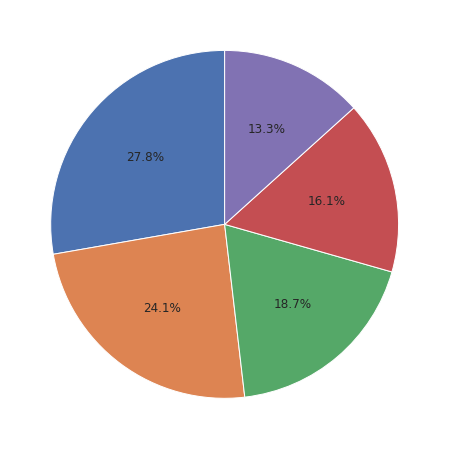

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df['Sentiment'].value_counts(), autopct='%1.1f%%',shadow=False,startangle=90)
plt.show()

In [ ]:
list(df.loc[df["Sentiment"]=='Negative','OriginalTweet'])[0]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

In [ ]:
list(df.loc[df["Sentiment"]=='Positive','OriginalTweet'])[0]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [ ]:
list(df.loc[df["Sentiment"]=='Neutral','OriginalTweet'])[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

In [ ]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,9130
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


London is the place from where most tweets were made.

In [ ]:
count_of_tweets = list(df['TweetAt'].value_counts())
date_of_tweets = list(df['TweetAt'].unique())
date_df = pd.DataFrame(list(zip(date_of_tweets,count_of_tweets)),columns=['Date','Count of Tweets'])
date_df.sort_values(by=['Count of Tweets'],ascending=False).head(10)

,Date,Count of Tweets
0,2020-03-16,3448
1,2020-03-17,3215
2,2020-03-18,2979
3,2020-03-19,2742
4,2020-03-20,2653
5,2020-03-21,2114
6,2020-03-22,2062
7,2020-03-23,1977
8,2020-03-24,1881
9,2020-03-25,1843


On 16/03 most tweets were made. 

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3


In [ ]:
len(list(df['UserName'].unique()))

41157

### Word cloud for negative statements

In [ ]:
neg_phrases = df[df.Sentiment == 'Negative']
neg_words = []
for t in neg_phrases.OriginalTweet:
    neg_words.append(t)
neg_words[:4]

["For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",
 '@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer',
 'In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn',
 'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.c

In [ ]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'For corona prevention,we should stop to buy things with the cash and should use online payment metho'

In [ ]:
for t in neg_phrases.OriginalTweet[:300]:
    if 'good' in t:
        print(t)




#Covid_19 https://t.co/pzirO10avf
People seen stocking up on goods into trolleys after the panic buying rumours spread today at hypermarket in Kajang March 16 2020 Picture by Shafwan Zaidon



yet, Korea's supermarket never out of stock while Malaysia.....empty shelf here and there. The government should totally consider on limiting some necessity goods to every consumer in the market.
@nytopinion @McDonalds @SUBWAY @ChickfilA @CrackerBarrel @Outback @Cheesecake You asked the workers, we asked the restaurants! HereÂs what the top 20 are offering during the outbreak (hint: itÂs not good): https://t.co/e2ZNXajPre

#CoronavirusOutbreak #coronavirus #CoronaVirusUpdates #panicbuying #COVID2019 #COVID19 #COVID?19 #Repost #QuarantineLife #QuarantineAndChill #SocialDistance #StayTheFHome #Corona #wtf https://t.co/yQrUtMwgw9








Thread ?
Seattle to provide $800 in supermarket vouchers to thousands of families during coronavirus crisis, mayor says https://t.co/jupy1W34KK to more than 6,

In [ ]:
pos_phrases = df[df.Sentiment == "Positive"] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.OriginalTweet:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbe'

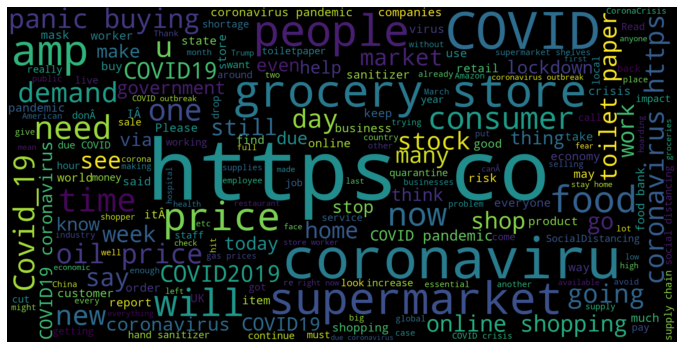

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for Positive Statements

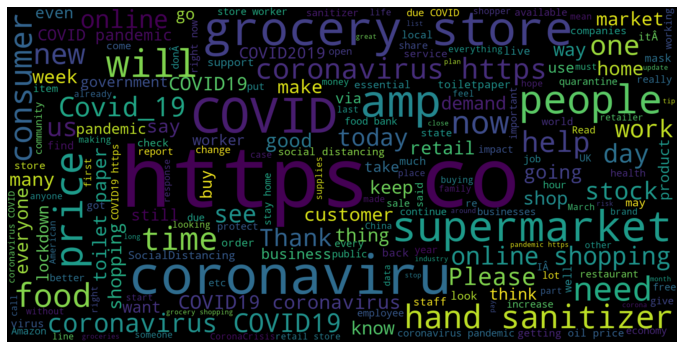

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
DF = df.copy()

#Method 1: Tf-Idf Approach

##Preprocessing data

In [ ]:
df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [ ]:
def preprocessing_text(data):
  data =data.lower()
  data = re.sub(r'http\S+|www\S+|https\S',' ',data,flags=re.MULTILINE)
  data = data.translate(str.maketrans('','',string.punctuation))
  data = re.sub(r'\@\w+|\#'," ", data)
  data_token = word_tokenize(data)
  filtered_words = [word for word in data_token if word not in stop_words]
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in filtered_words]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
  return ' '.join(lemma_words)

In [ ]:
df['Processed_text'] = df['OriginalTweet'].apply(preprocessing_text)

In [ ]:
df.head()

,OriginalTweet,Sentiment,TweetMonth,Processed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,3,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,3,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,3,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,readi go supermarket covid19 outbreak im paran...


In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
encoders_nums = {"Sentiment":{"Neutral": 'Neutral' ,"Positive": 'Positive','Extremely Negative':'Negative','Extremely Positive':'Positive','Negative':'Negative'}}
df = df.replace(encoders_nums)

In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

##Model Training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['Processed_text'])
tfidf

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 459294 stored elements in Compressed Sparse Row format>

In [ ]:
x = df.Processed_text
y = df.Sentiment
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 225)
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

x_train:  37041
x_test:  4116
y_train:  37041
y_test:  4116


In [ ]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = model.predict(x_test)
prediction_train = model.predict(x_train)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

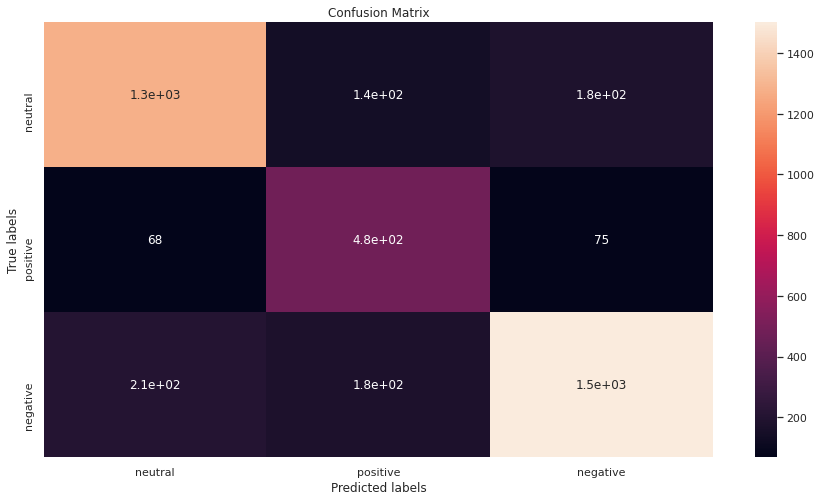

In [ ]:
cm_test = confusion_matrix(predictions,y_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells
labels = ['neutral', 'positive','negative']
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

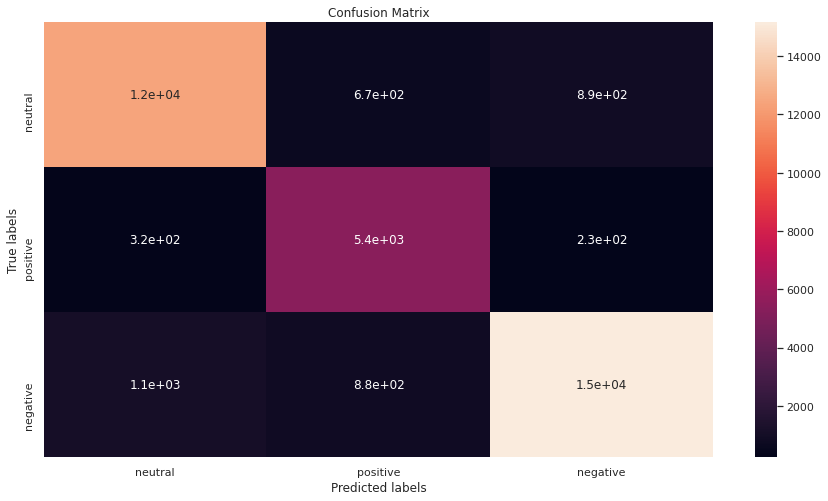

In [ ]:
cm_train = confusion_matrix(prediction_train,y_train)
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precission of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))

Accuracy score of train set:  0.8908776760886585
Precission of train set:  0.8948535506549515
Recall of train set:  0.8908776760886585


In [ ]:
print('Accuracy score of test set: ',accuracy_score(predictions,y_test))
print('Precission of test set: ',precision_score(predictions,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(predictions,y_test, average = 'weighted'))

Accuracy score of test set:  0.7920310981535471
Precission of test set:  0.802662900884536
Recall of test set:  0.7920310981535471


In [ ]:
print(classification_report(y_test,predictions))
print("\n")
print(classification_report(y_train,prediction_train))

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      1552
     Neutral       0.77      0.60      0.67       803
    Positive       0.80      0.85      0.82      1761

    accuracy                           0.79      4116
   macro avg       0.79      0.76      0.77      4116
weighted avg       0.79      0.79      0.79      4116



              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89     13846
     Neutral       0.91      0.78      0.84      6910
    Positive       0.89      0.93      0.91     16285

    accuracy                           0.89     37041
   macro avg       0.89      0.87      0.88     37041
weighted avg       0.89      0.89      0.89     37041



##Try Example

In [ ]:
example = ['Today is a good day']
result = model.predict(example)
print(result)

['Positive']


##Model Saving as Pickle file

In [ ]:
import pickle
 
filename = 'sentiment_analysis'
pickle.dump(model,open(filename,'wb'))

In [ ]:
from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')

['model.pkl']

# Method 2 : CountVectorizer Approach

###Data Preparation

In [6]:
####### code to remove unimportant text from the data #######

list_of_tweets = []
b = []
c = []
for i in range(len(DF['OriginalTweet'])):
  a = DF['OriginalTweet'][i].split(' ')
  for j in a:
    if 'https' in j:
      pass
    else:
      b.append(j) 
  c.append(' '.join(b))
  b = []
for l in c:
  list_of_tweets.append(l) 

# assigning 'OriginalTweet' column to the above list

DF['OriginalTweet'] = list_of_tweets

# downloading stopwords

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

# function to remove punctuations and stopwords

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

# processing the text 

DF['OriginalTweet'] = DF['OriginalTweet'].apply(lambda x : text_process(x))


# changing the values in the data accordingly

for i in range(len(DF['Sentiment'])):
  if DF['Sentiment'][i] == 'Extremely Negative':
    DF['Sentiment'][i] = 'Negative'
  elif DF['Sentiment'][i] == 'Extremely Positive':
    DF['Sentiment'][i] = 'Positive'

# providing necessary class values

''' for negative values = -1
        Positive values = 1   
        neutral values = 0 '''

for i in range(len(df['Sentiment'])):
  if DF['Sentiment'][i] == 'Negative':
    DF['Sentiment'][i] = -1
  elif DF['Sentiment'][i] == 'Positive':
    DF['Sentiment'][i] = 1
  elif DF['Sentiment'][i] == 'Neutral': 
    DF['Sentiment'][i] = 0

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

# applying stemming function

DF['OriginalTweet'] = DF['OriginalTweet'].apply(stemming)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
DF.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv,0
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,1
3,3802,48754,London,16-03-2020,food stock one empti pleas dont panic enough f...,1
4,3803,48755,London,16-03-2020,readi go supermarket covid19 outbreak im paran...,-1


##Model Training

In [8]:
# vectorizing the data from 'OriginalTweet' column

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(DF['OriginalTweet'])

# assigning dependent and independent variables

X = X.toarray() 
y = DF['Sentiment']
y=y.astype('int')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (32925, 5121)
x_test shape:  (8232, 5121)
y_train shape:  (32925,)
y_test shape:  (8232,)


In [10]:
# applying logistic regression model

model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# getting appropriate predictions on train and test sets

prediction_test = model.predict(x_test)
prediction_train = model.predict(x_train)

## Evaluation Metrics

[[11411   394   592]
 [  266  5353   283]
 [  622   407 13597]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

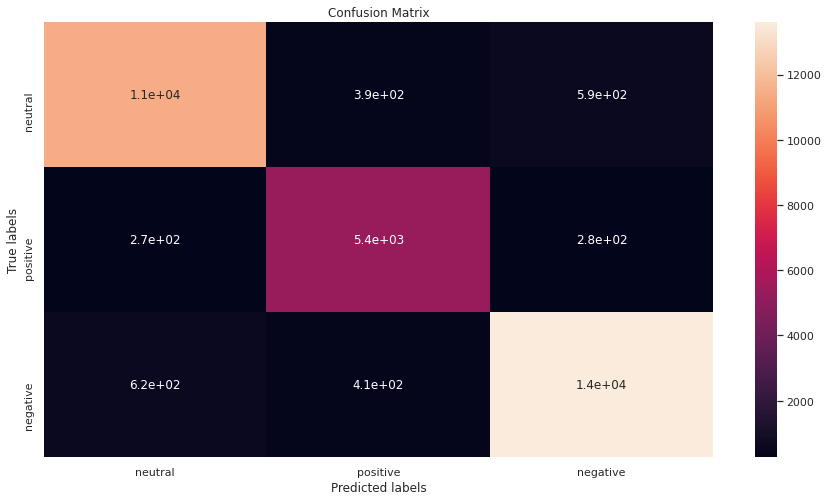

In [ ]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(prediction_train,y_train)
print(cm_train)

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2593  191  342]
 [ 184 1155  187]
 [ 322  213 3045]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

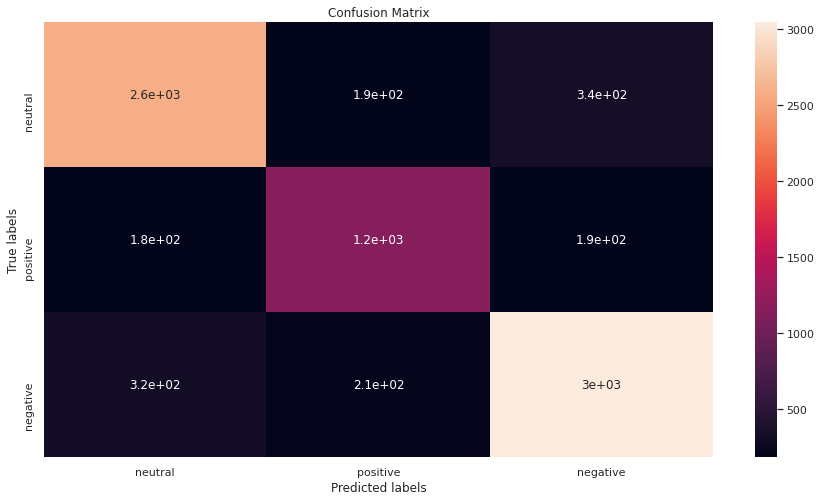

In [ ]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(prediction_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [12]:
# getting differant scores of train set

print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precision of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))
print('F1-score of train set: ',f1_score(prediction_train, y_train, average='weighted'))

Accuracy score of train set:  0.8866514806378132
Precision of train set:  0.8875615266256266
Recall of train set:  0.8866514806378132
F1-score of train set:  0.8869708854574941


In [13]:
# getting differant scores of test set

print('Accuracy score of test set: ',accuracy_score(prediction_test,y_test))
print('Precision of test set: ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(prediction_test,y_test, average = 'weighted'))
print('F1-score of test set: ',f1_score(prediction_test, y_test, average='weighted'))

Accuracy score of test set:  0.8033284742468416
Precision of test set:  0.8046727775737095
Recall of test set:  0.8033284742468416
F1-score of test set:  0.8038953821105832


In [14]:
# getting classification report for train and test sets

print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,prediction_test))

Train set report


              precision    recall  f1-score   support

          -1       0.89      0.89      0.89     12299
           0       0.86      0.81      0.83      6154
           1       0.90      0.91      0.90     14472

    accuracy                           0.89     32925
   macro avg       0.88      0.87      0.88     32925
weighted avg       0.89      0.89      0.89     32925



Test set report


              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3099
           0       0.73      0.69      0.71      1559
           1       0.83      0.84      0.84      3574

    accuracy                           0.80      8232
   macro avg       0.79      0.78      0.79      8232
weighted avg       0.80      0.80      0.80      8232



#Naive bayes classifier

In [15]:
from sklearn.naive_bayes import GaussianNB
sentiment_model = GaussianNB().fit(x_train,y_train)

In [16]:
train_preds = sentiment_model.predict(x_train)
test_preds = sentiment_model.predict(x_test)

[[4623   51 1455]
 [7007 6086 9303]
 [ 669   17 3714]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

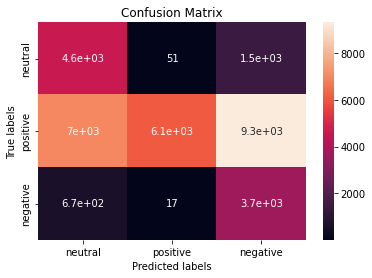

In [21]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(train_preds,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1176  123  526]
 [1564 1320 1971]
 [ 359  116 1077]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

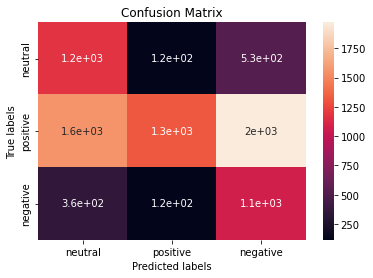

In [35]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(test_preds,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [20]:
# Print the classification report for train and test
print('Train set report')
print("\n")
print(classification_report(y_train,train_preds))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,test_preds))

Train set report


              precision    recall  f1-score   support

          -1       0.75      0.38      0.50     12299
           0       0.27      0.99      0.43      6154
           1       0.84      0.26      0.39     14472

    accuracy                           0.44     32925
   macro avg       0.62      0.54      0.44     32925
weighted avg       0.70      0.44      0.44     32925



Test set report


              precision    recall  f1-score   support

          -1       0.64      0.32      0.43      3099
           0       0.25      0.87      0.39      1559
           1       0.68      0.22      0.34      3574

    accuracy                           0.39      8232
   macro avg       0.52      0.47      0.39      8232
weighted avg       0.58      0.39      0.38      8232

